In [5]:
rm(list=ls())
gc()
library(Seurat)

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,2069068,110.6,4266582,227.9,3318906,177.3
Vcells,3502545,26.8,73223236,558.7,74991622,572.2


In [6]:
setwd("scRNAseq_WBC_revision/newData")

In [7]:
load("Lymophiod20210328.seurat.object.Rdata")

In [8]:
ls()
seurat

[1] "seurat"

An object of class Seurat 
25723 features across 7479 samples within 1 assay 
Active assay: RNA (25723 features)
 1 dimensional reduction calculated: umap

In [9]:
lym=seurat
rm(seurat)

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”

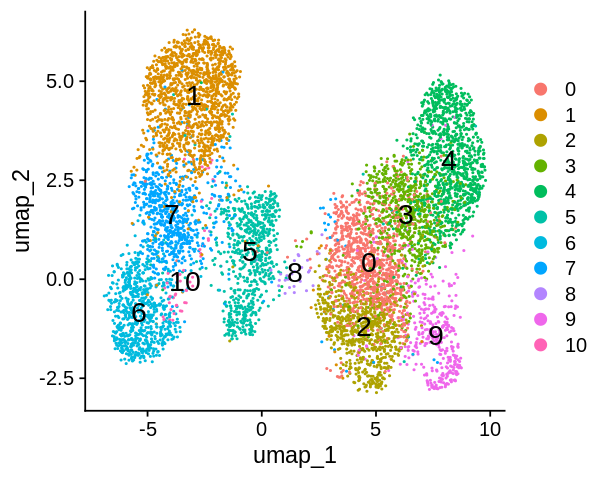

In [10]:
options(repr.plot.width=5,repr.plot.height=4)
DimPlot(lym,reduction = "umap",label = T,label.size = 6,group.by = "new_louvain")

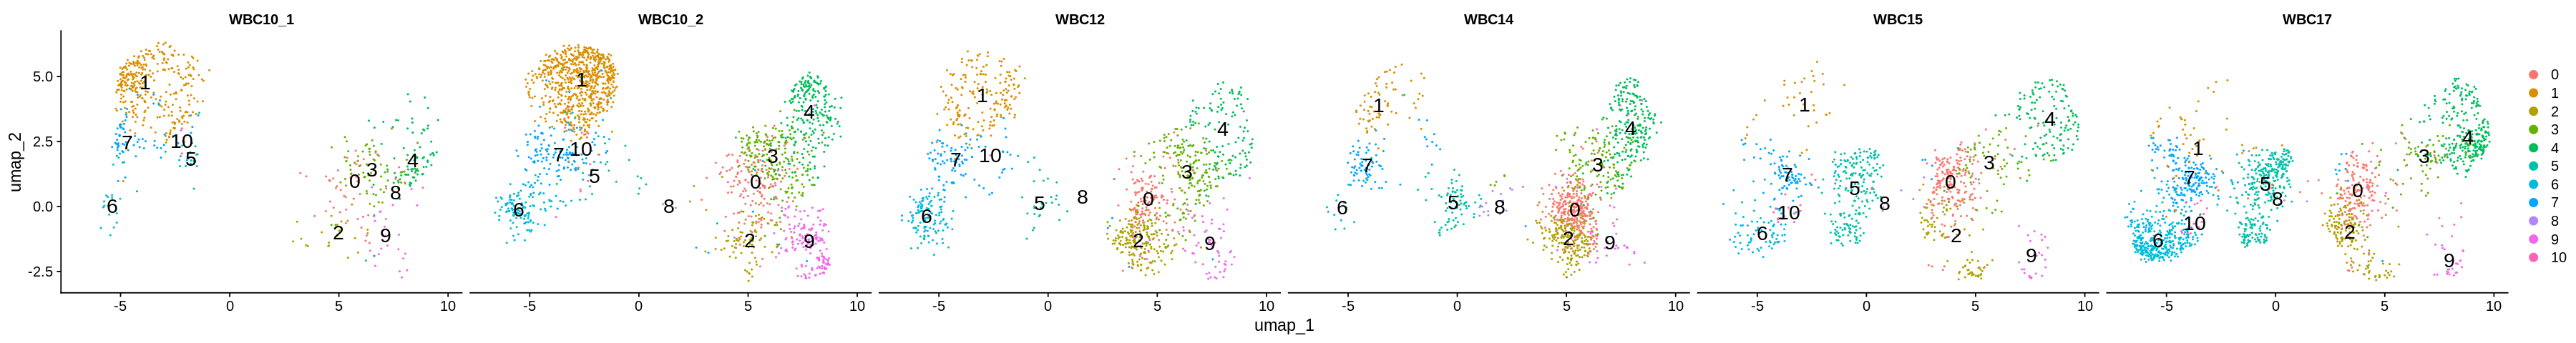

In [12]:
options(repr.plot.width=30,repr.plot.height=4)
DimPlot(lym,reduction = "umap",label = T,label.size = 6,split.by = "batch",group.by = "new_louvain")

In [13]:
table(lym$batch)
Idents(lym)=lym$new_louvain
levels(lym)


WBC10_1 WBC10_2   WBC12   WBC14   WBC15   WBC17 
    689    1834    1139    1164     954    1699 

[1] "0"  "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10"

In [14]:
lym.sub=subset(lym,idents = setdiff(levels(lym),c("5","8")))
table(lym.sub$new_louvain)


   0    1    2    3    4    5    6    7    8    9   10 
1008 1383  758  724 1058    0  708  705    0  361   50 

In [15]:
lym.sub.monocle.exp.M=as.matrix(lym.sub@assays$RNA@counts)
lym.sub.monocle.cell.annotation=lym.sub@meta.data
lym.sub.monocle.gene.annotation=data.frame(gene_short_name=rownames(lym.sub),row.names=rownames(lym.sub))

In [16]:
save(lym.sub.monocle.cell.annotation,lym.sub.monocle.gene.annotation,lym.sub.monocle.exp.M,file="lym.sub.20210328.monocle.input.Rdata")

In [17]:
Idents(lym.sub)=lym.sub$batch
levels(lym.sub)

[1] "WBC10_1" "WBC10_2" "WBC12"   "WBC14"   "WBC15"   "WBC17"

In [15]:
new.id=rep(c("early","late"),each = 3)
names(new.id)=levels(lym.sub)
lym.sub=RenameIdents(lym.sub,new.id)
table(Idents(lym.sub))


early  late 
 6761  4163 

In [17]:
lym.sub$stage=Idents(lym.sub)
lym.sub.list=SplitObject(lym.sub,split.by = "stage")
names(lym.sub.list)

[1] "early" "late"

In [18]:
lym.sub.early.monocle.exp.M=as.matrix(lym.sub.list[[1]]@assays$RNA@counts)
lym.sub.early.monocle.cell.annotation=lym.sub.list[[1]]@meta.data
lym.sub.early.monocle.gene.annotation=data.frame(gene_short_name=rownames(lym.sub.list[[1]]),row.names=rownames(lym.sub.list[[1]]))
save(lym.sub.early.monocle.cell.annotation,lym.sub.early.monocle.gene.annotation,lym.sub.early.monocle.exp.M,file="lym.sub.early.monocle.input.Rdata")

In [19]:
lym.sub.late.monocle.exp.M=as.matrix(lym.sub.list[[2]]@assays$RNA@counts)
lym.sub.late.monocle.cell.annotation=lym.sub.list[[2]]@meta.data
lym.sub.late.monocle.gene.annotation=data.frame(gene_short_name=rownames(lym.sub.list[[2]]),row.names=rownames(lym.sub.list[[2]]))
save(lym.sub.late.monocle.cell.annotation,lym.sub.late.monocle.gene.annotation,lym.sub.late.monocle.exp.M,file="lym.sub.late.monocle.input.Rdata")

In [20]:
####################################################################################################################################

In [40]:
rm(list=ls())
gc()
library(monocle)

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,2715076,145.1,26122350,1395.1,40524805,2164.3
Vcells,310757656,2370.9,1081190368,8248.9,1195116787,9118.1


In [41]:
setwd("scRNAseq_WBC_revision/newData")

In [42]:
load("lym.sub.20210328.monocle.input.Rdata")
ls()

[1] "lym.sub.monocle.cell.annotation" "lym.sub.monocle.exp.M"          
[3] "lym.sub.monocle.gene.annotation"

In [43]:
#load("lym.sub.early.monocle.input.Rdata")
#ls()

In [4]:
#load("lym.sub.late.monocle.input.Rdata")
#ls()

[1] "lym.sub.late.monocle.cell.annotation"
[2] "lym.sub.late.monocle.exp.M"          
[3] "lym.sub.late.monocle.gene.annotation"

In [44]:
pd <- new('AnnotatedDataFrame', data = lym.sub.monocle.cell.annotation)
fd <- new('AnnotatedDataFrame', data = lym.sub.monocle.gene.annotation)

In [45]:
rownames(pd)=colnames(lym.sub.monocle.exp.M)

In [46]:
monocle_cds <- newCellDataSet(lym.sub.monocle.exp.M,
                         phenoData = pd,
                         featureData = fd,
                         expressionFamily = negbinomial.size())

In [47]:
lym<-monocle_cds
lym <- estimateSizeFactors(lym)
lym <- estimateDispersions(lym)

Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message 

Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning 

Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning 

Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: algorithm stopped at boundary value”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning mes

Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs pr

Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”


Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”


Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs pr

In [48]:
lym <- detectGenes(lym, min_expr = 3 )

In [49]:
dim(lym)

Features  Samples 
   25723     6755

In [50]:
expressed_genes <- row.names(subset(fData(lym),num_cells_expressed >= 5))

'data.frame':	18851 obs. of  4 variables:
 $ gene_id             : Factor w/ 18851 levels "A1BG","A1BG-AS1",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ mean_expression     : num  0.06222 0.00631 0.07535 0.0094 0.00323 ...
 $ dispersion_fit      : num  3.46 34.18 2.86 22.94 66.74 ...
 $ dispersion_empirical: num  6.36 7.42 2.76 19.1 127.38 ...


Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”


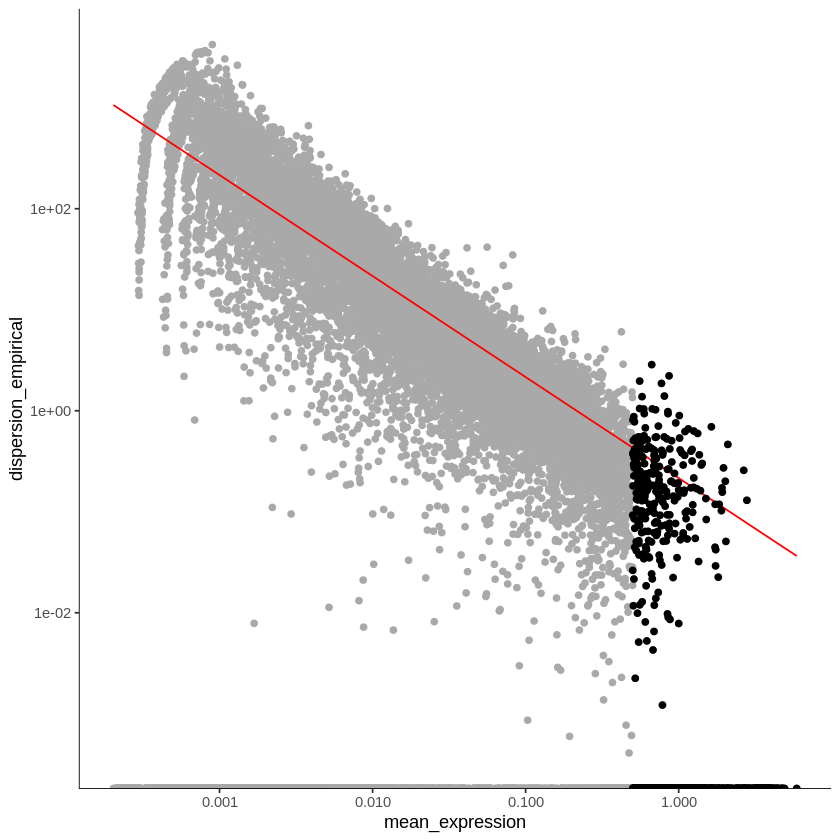

In [51]:
disp_table <- dispersionTable(lym)
str(disp_table)
unsup_clustering_genes <- subset(disp_table, mean_expression >= 0.5)
lym <- setOrderingFilter(lym, unsup_clustering_genes$gene_id)
plot_ordering_genes(lym)

In [52]:
lym <- reduceDimension(lym, max_components = 2, num_dim = 15,reduction_method = 'tSNE', verbose = T)

Remove noise by PCA ...

Reduce dimension by tSNE ...



In [53]:
lym <- clusterCells(lym)

Distance cutoff calculated to 4.317202 


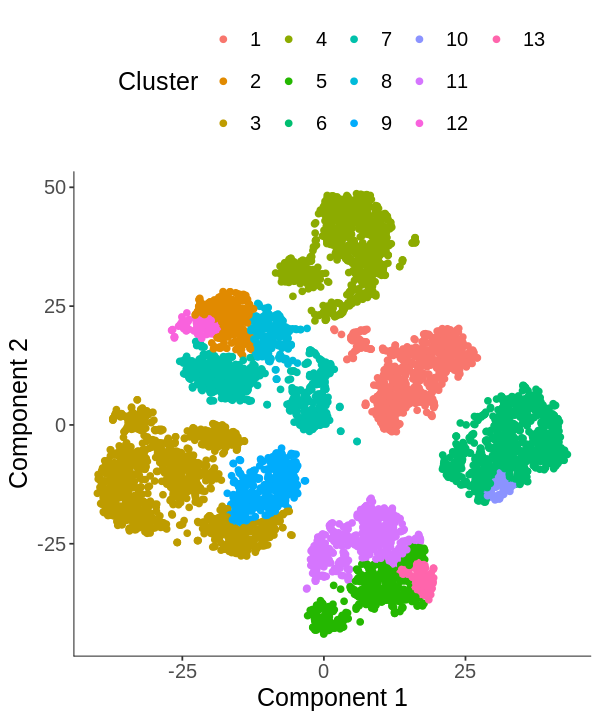

In [54]:
options(repr.plot.width=5,repr.plot.height=6)
plot_cell_clusters(lym, 1, 2)

In [55]:
str(lym.sub.monocle.cell.annotation)

'data.frame':	6755 obs. of  14 variables:
 $ orig.ident             : Factor w/ 1 level "SeuratProject": 1 1 1 1 1 1 1 1 1 1 ...
 $ nCount_RNA             : num  2697 2447 2684 2532 1415 ...
 $ nFeature_RNA           : int  2386 2341 2425 2240 490 1748 2019 2056 2497 2298 ...
 $ n_genes                : num  2386 2341 2425 2240 490 ...
 $ n_genes_by_counts      : int  2386 2341 2425 2240 490 1748 2019 2056 2497 2298 ...
 $ log1p_n_genes_by_counts: num  7.78 7.76 7.79 7.71 6.2 ...
 $ total_counts           : num  8910 11059 9667 10070 792 ...
 $ log1p_total_counts     : num  9.1 9.31 9.18 9.22 6.68 ...
 $ total_counts_mt        : num  183 218 217 227 36 17 140 251 276 29 ...
 $ log1p_total_counts_mt  : num  5.21 5.39 5.38 5.43 3.61 ...
 $ pct_counts_mt          : num  2.05 1.97 2.24 2.25 4.55 ...
 $ batch                  : Factor w/ 6 levels "WBC10_1","WBC10_2",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ louvain                : Factor w/ 17 levels "0","1","2","3",..: 12 13 12 13 2 13 7 6 2 13 ...


In [56]:
table(lym$new_louvain)
lym$new_louvain=as.character(lym$new_louvain)


   0    1    2    3    4    5    6    7    8    9   10 
1008 1383  758  724 1058    0  708  705    0  361   50 

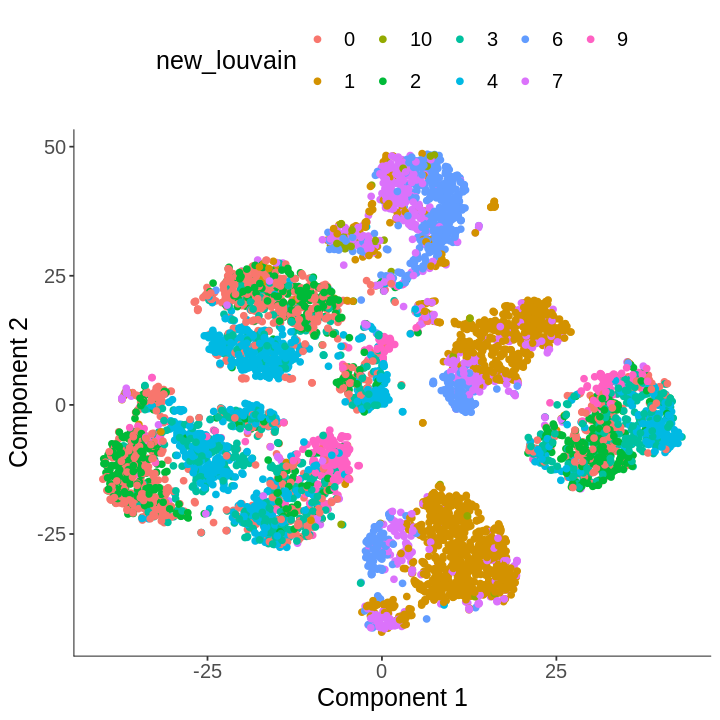

In [57]:
options(repr.plot.width=6,repr.plot.height=6)
plot_cell_clusters(lym, 1, 2, color = "new_louvain")

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”


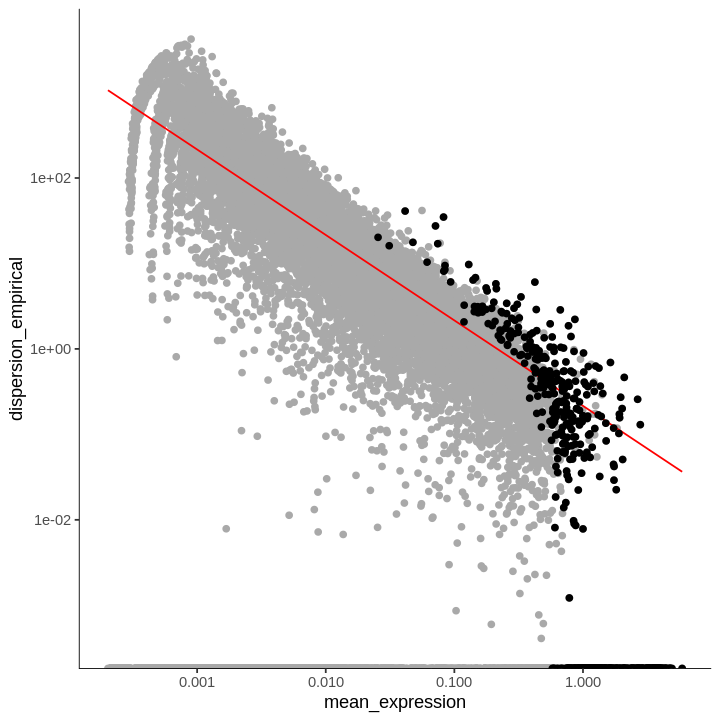

In [58]:
diff_test_res <- differentialGeneTest(lym[expressed_genes,],fullModelFormulaStr = "~num_genes_expressed")
ordering_genes <- row.names (subset(diff_test_res, pval < 0.1)) 

lym <- setOrderingFilter(lym, ordering_genes)
plot_ordering_genes(lym)

In [59]:
lym <- reduceDimension(lym, max_components = 2,method = 'tSNE')

In [39]:
lym <- orderCells(lym,root_state = c("5","7"))
#lym <- orderCells(lym)

Warning message in `==.default`(State, root_state):
“longer object length is not a multiple of shorter object length”
Warning message in is.na(e1) | is.na(e2):
“longer object length is not a multiple of shorter object length”


In [28]:
############################################################################################################################
#<lym.sub.monocle.exp.M>的作图

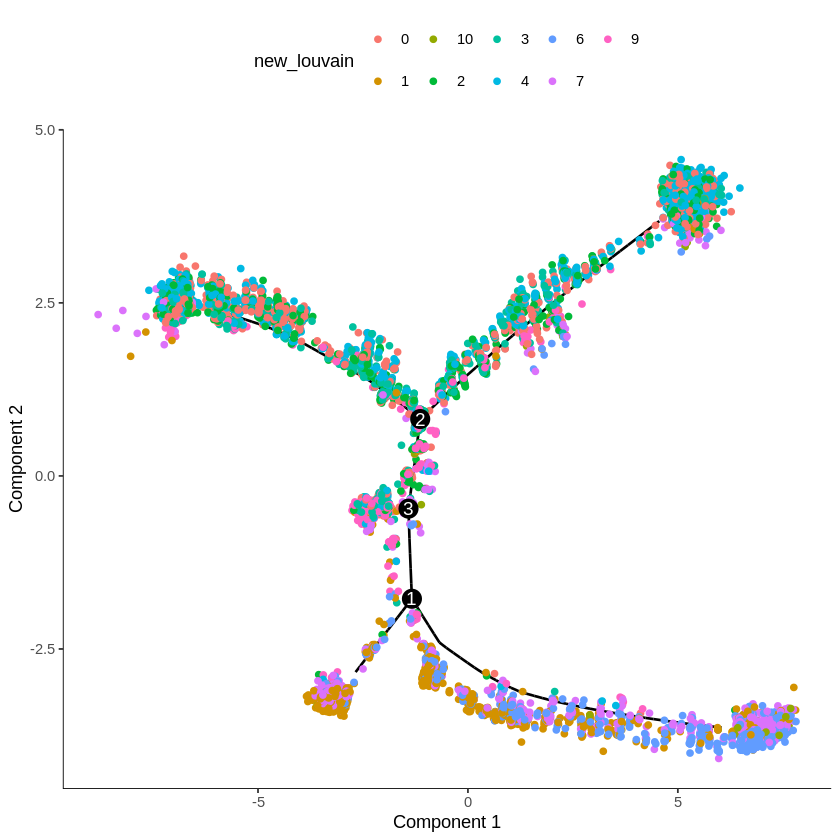

In [34]:
options(repr.plot.width=7,repr.plot.height=7)
plot_cell_trajectory(lym, color_by = "new_louvain")

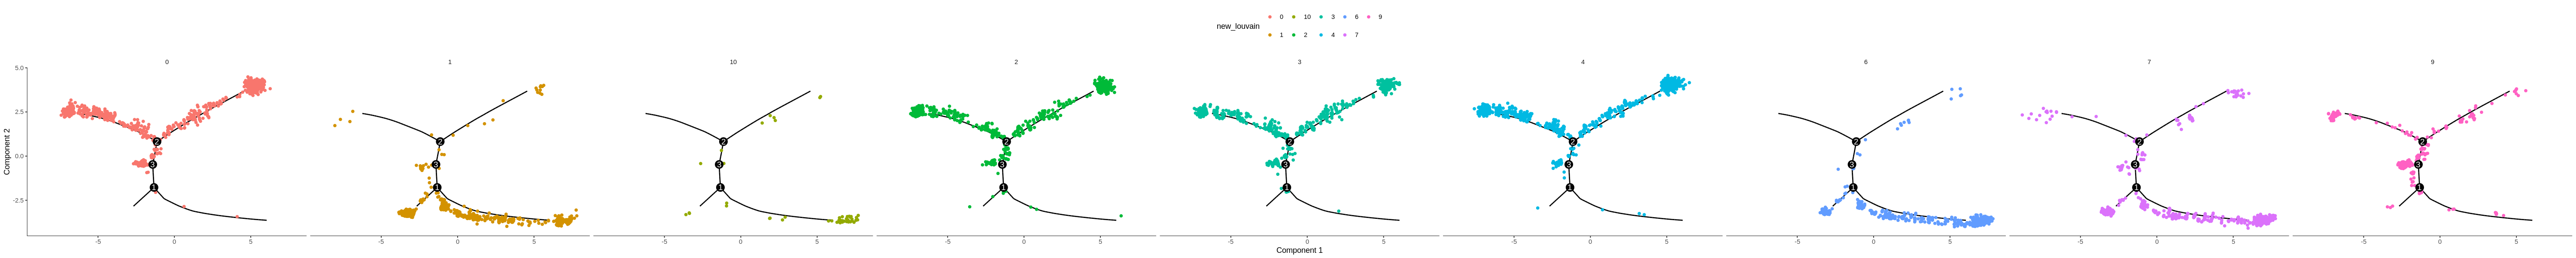

In [35]:
options(repr.plot.width=50,repr.plot.height=5)
plot_cell_trajectory(lym, color_by = "new_louvain") +facet_wrap(~new_louvain, nrow = 1)

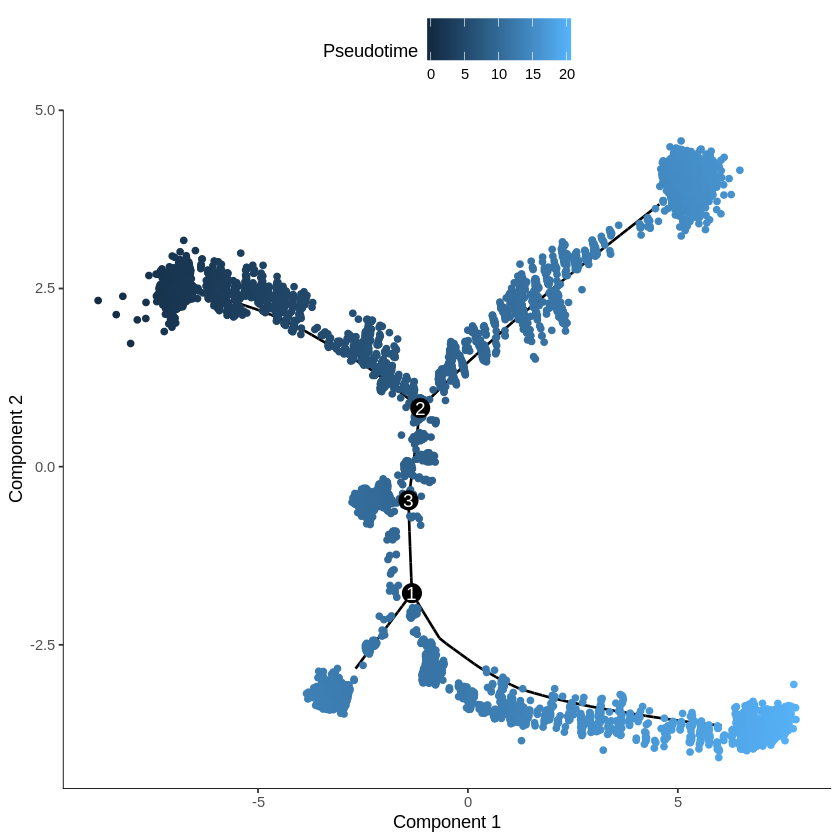

In [36]:
options(repr.plot.width=7,repr.plot.height=7)
plot_cell_trajectory(lym, color_by = "Pseudotime")

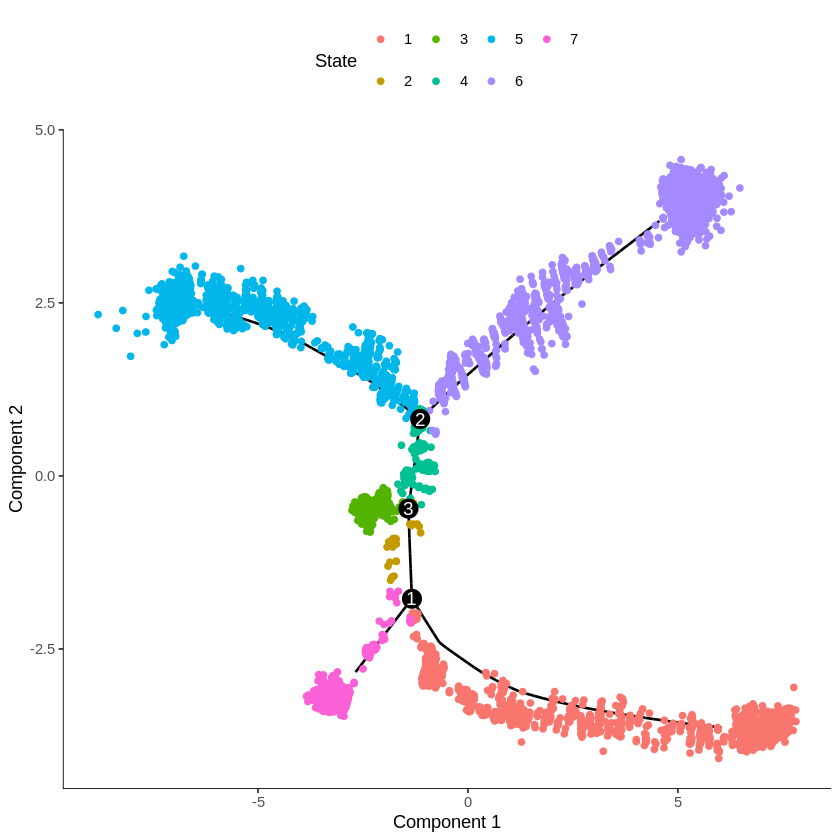

In [37]:
options(repr.plot.width=7,repr.plot.height=7)
plot_cell_trajectory(lym, color_by = "State")

In [38]:
save.image("lym.sub.20210328.monocle.object.Rdata")

In [29]:
#</lym.sub.monocle.exp.M>的作图
#############################################################################

In [ ]:
#############################################################################
#<lym.sub.early.monocle.exp.M>的作图

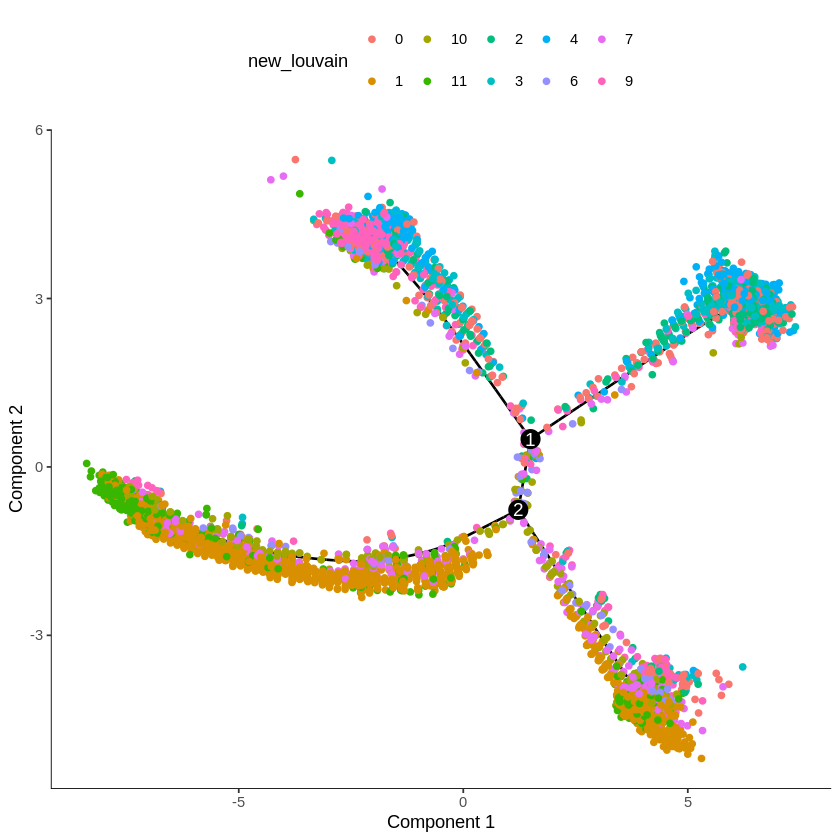

In [53]:
options(repr.plot.width=7,repr.plot.height=7)
plot_cell_trajectory(lym, color_by = "new_louvain")

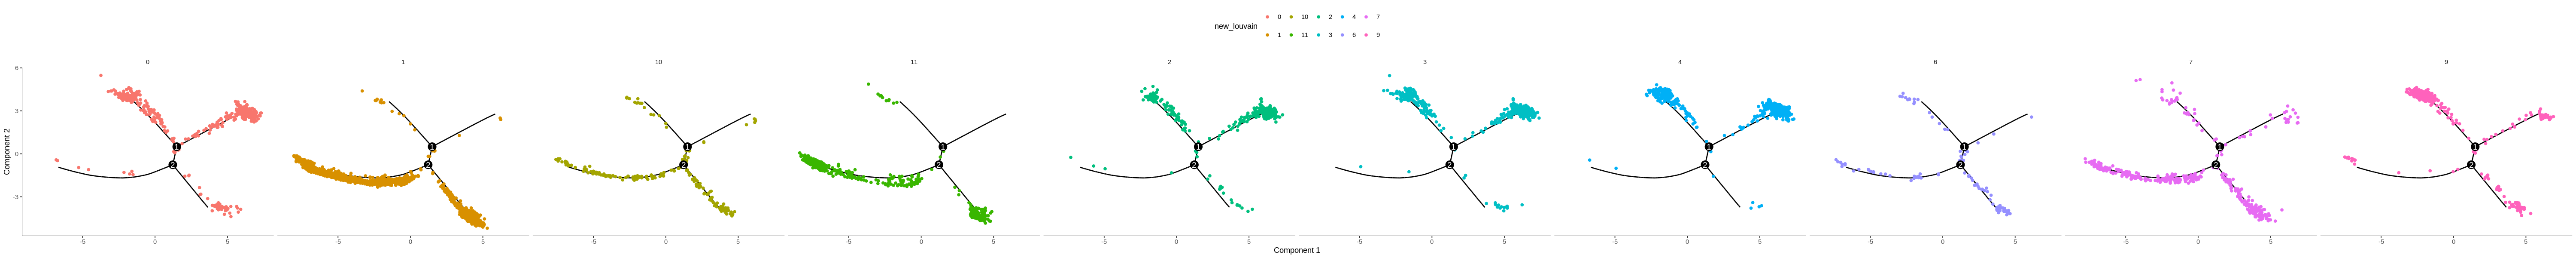

In [54]:
options(repr.plot.width=50,repr.plot.height=5)
plot_cell_trajectory(lym, color_by = "new_louvain") +facet_wrap(~new_louvain, nrow = 1)

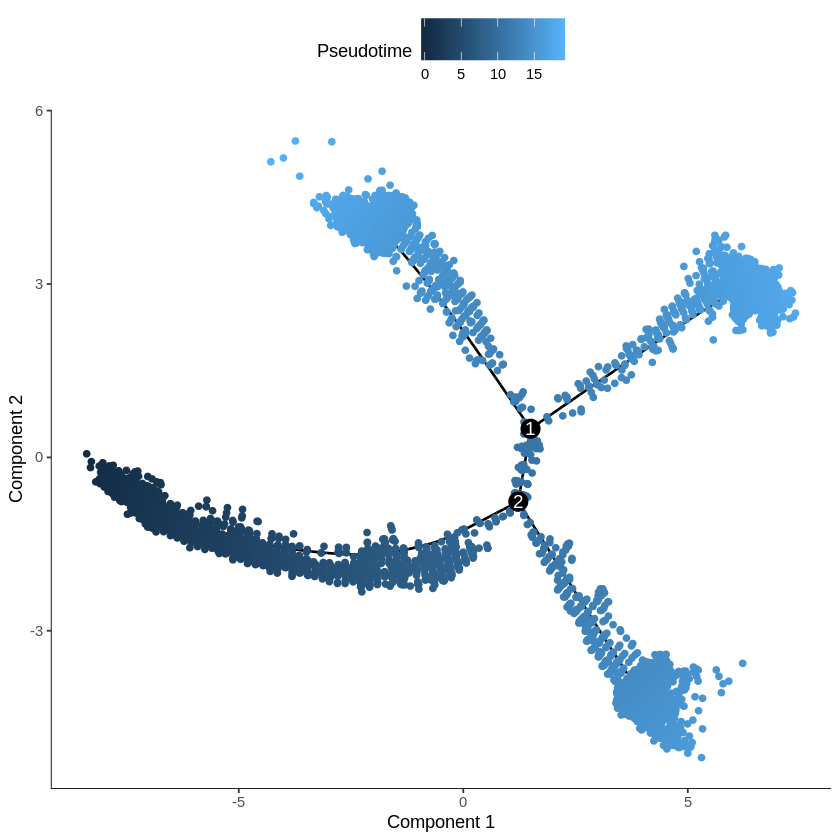

In [55]:
options(repr.plot.width=7,repr.plot.height=7)
plot_cell_trajectory(lym, color_by = "Pseudotime")

In [56]:
save.image("lym.sub.early.monocle.object.Rdata")

In [ ]:
#</lym.sub.early.monocle.exp.M>的作图
#############################################################################

In [ ]:
#############################################################################
#<lym.sub.late.monocle.exp.M>的作图

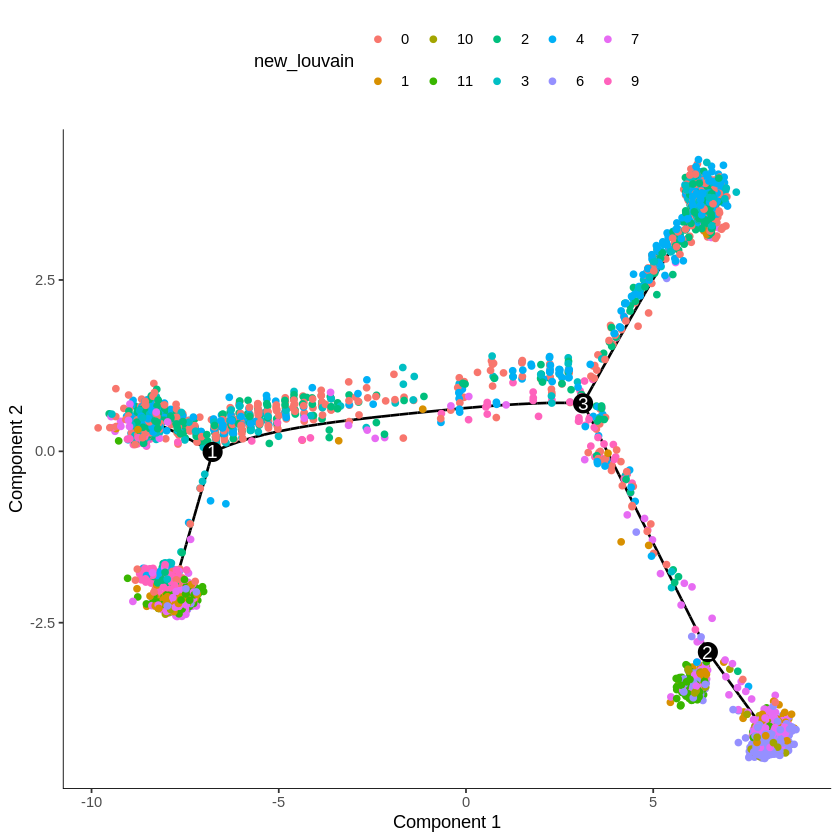

In [77]:
options(repr.plot.width=7,repr.plot.height=7)
plot_cell_trajectory(lym, color_by = "new_louvain")

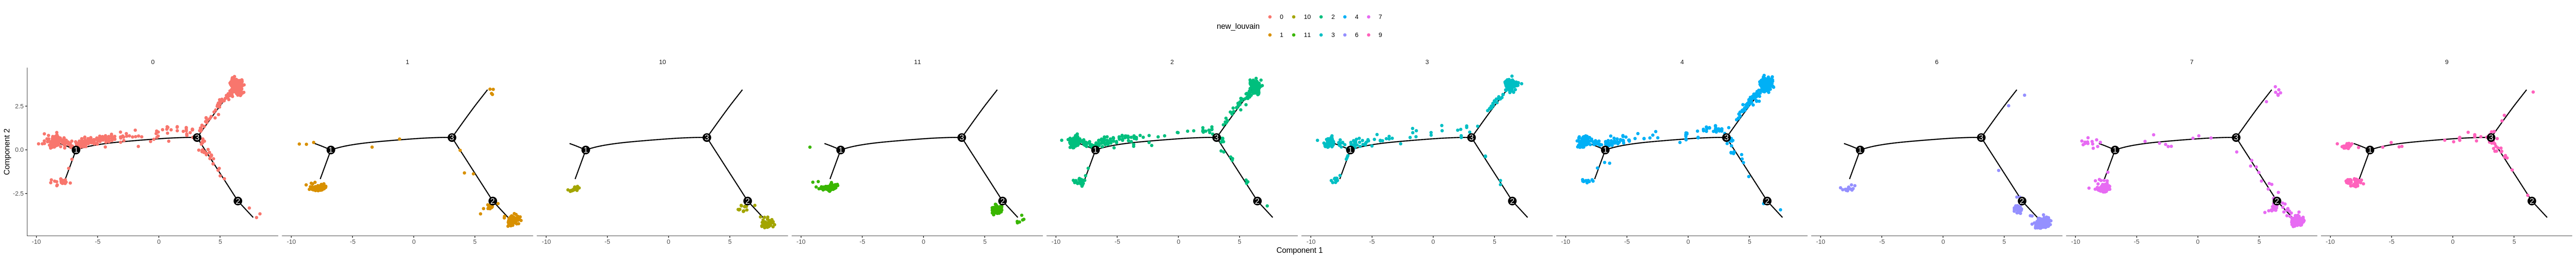

In [78]:
options(repr.plot.width=50,repr.plot.height=5)
plot_cell_trajectory(lym, color_by = "new_louvain") +facet_wrap(~new_louvain, nrow = 1)

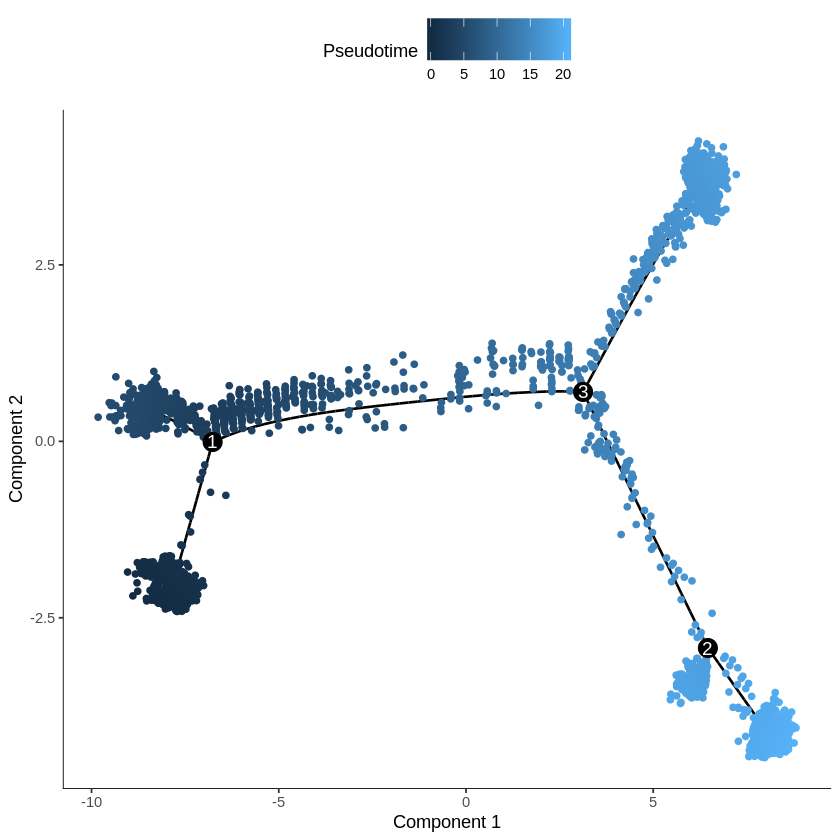

In [79]:
options(repr.plot.width=7,repr.plot.height=7)
plot_cell_trajectory(lym, color_by = "Pseudotime")

In [80]:
save.image("lym.sub.late.monocle.object.Rdata")

In [ ]:
#</lym.sub.late.monocle.exp.M>的作图
#############################################################################